<a href="https://www.kaggle.com/code/anderaraujo/forest-fires-in-brazil-predicted-with-prophet?scriptVersionId=105620195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Prediction of Forest fires in Brazil

In this case I worked to make a prediction of fires in Brazil from to 2017 to 2023.
I also show the states and the amount of fires for each one.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/forest-fires-in-brazil/amazon.csv", encoding = "ISO-8859-1",
                index_col = ['date'],
                parse_dates = ['date'])

## Exploring data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6454 entries, 1998-01-01 to 2016-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 252.1+ KB


There is no null values

In [4]:
df

,year,state,month,number
date,,,,
1998-01-01,1998,Acre,Janeiro,0.0
1999-01-01,1999,Acre,Janeiro,0.0
2000-01-01,2000,Acre,Janeiro,0.0
2001-01-01,2001,Acre,Janeiro,0.0
2002-01-01,2002,Acre,Janeiro,0.0
...,...,...,...,...
2012-01-01,2012,Tocantins,Dezembro,128.0
2013-01-01,2013,Tocantins,Dezembro,85.0
2014-01-01,2014,Tocantins,Dezembro,223.0


Here I realized that date was not following the month numbers. So, I decided manipulating the data in order to create a new collumn date based on year and month columns.

In [5]:
months = df.month.unique()
months_num = np.arange(1,13) 

In [6]:
months_transform = {mon:mon_num for mon, mon_num in zip(months, months_num)}

In [7]:
df['month_num'] = df['month'].map(months_transform)

In [8]:
df

,year,state,month,number,month_num
date,,,,,
1998-01-01,1998,Acre,Janeiro,0.0,1
1999-01-01,1999,Acre,Janeiro,0.0,1
2000-01-01,2000,Acre,Janeiro,0.0,1
2001-01-01,2001,Acre,Janeiro,0.0,1
2002-01-01,2002,Acre,Janeiro,0.0,1
...,...,...,...,...,...
2012-01-01,2012,Tocantins,Dezembro,128.0,12
2013-01-01,2013,Tocantins,Dezembro,85.0,12
2014-01-01,2014,Tocantins,Dezembro,223.0,12


In [9]:
df['new_date'] = pd.to_datetime(df.year.astype('str') + "-" + df.month_num.astype('str'))

In [10]:
df

,year,state,month,number,month_num,new_date
date,,,,,,
1998-01-01,1998,Acre,Janeiro,0.0,1,1998-01-01
1999-01-01,1999,Acre,Janeiro,0.0,1,1999-01-01
2000-01-01,2000,Acre,Janeiro,0.0,1,2000-01-01
2001-01-01,2001,Acre,Janeiro,0.0,1,2001-01-01
2002-01-01,2002,Acre,Janeiro,0.0,1,2002-01-01
...,...,...,...,...,...,...
2012-01-01,2012,Tocantins,Dezembro,128.0,12,2012-12-01
2013-01-01,2013,Tocantins,Dezembro,85.0,12,2013-12-01
2014-01-01,2014,Tocantins,Dezembro,223.0,12,2014-12-01


In [11]:
df.set_index('new_date', inplace = True)

In [12]:
df.sort_index(inplace=True)

## Exploratory visualization

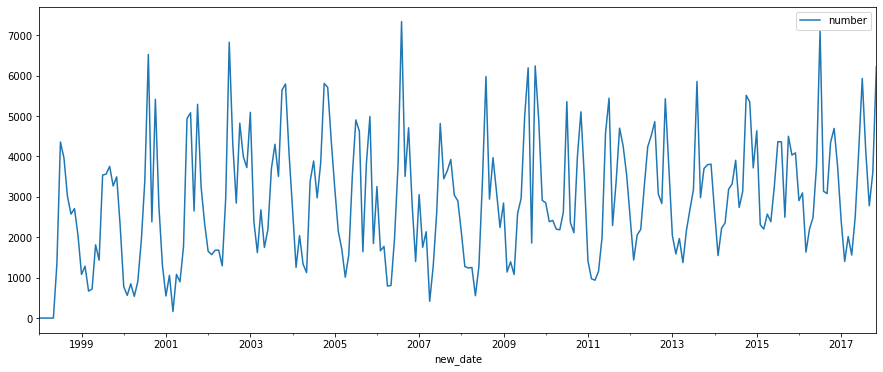

In [13]:
df.groupby(df.index).sum()[['number']].plot(figsize=(15,6))
plt.style.use('ggplot')
plt.show()

In [14]:
df_grouped = df.groupby(df.index).sum()[['number']]

In [15]:
df

,year,state,month,number,month_num
new_date,,,,,
1998-01-01,1998,Acre,Janeiro,0.0,1
1998-01-01,1998,Paraiba,Janeiro,0.0,1
1998-01-01,1998,Pará,Janeiro,0.0,1
1998-01-01,1998,Rio,Janeiro,0.0,1
1998-01-01,1998,Tocantins,Janeiro,0.0,1
...,...,...,...,...,...
2017-11-01,2017,Mato Grosso,Novembro,133.0,11
2017-11-01,2017,Alagoas,Novembro,10.0,11
2017-11-01,2017,Santa Catarina,Novembro,152.0,11


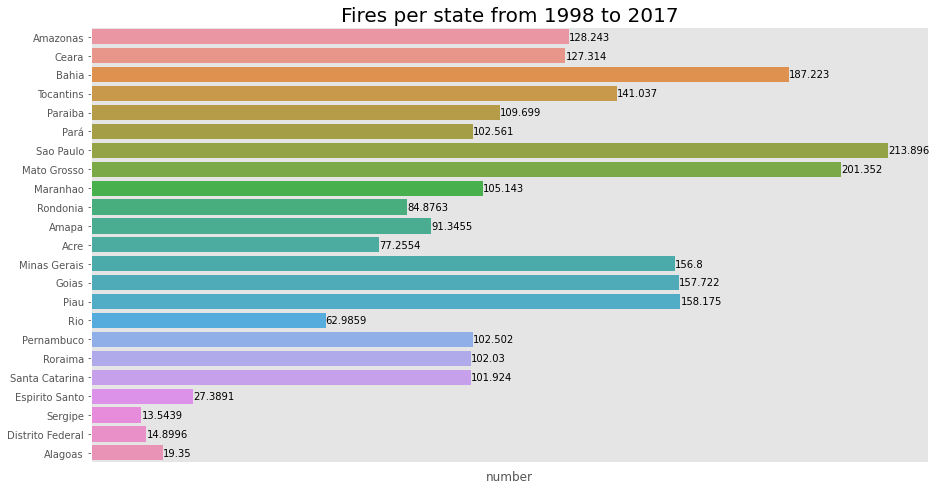

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data= df.sort_values(by='number', ascending=False), x = 'number', y= 'state', ci=None, ax=ax)
ax.set_xticks(ticks=[])
ax.bar_label(ax.containers[0])
plt.title('Fires per state from 1998 to 2017', fontdict={'fontsize':20})
plt.ylabel('')
plt.style.use('ggplot')
plt.show()


## Testing data with Augmented Dickey-Fuller Test

this test is made in order to check if data is non-stationary

In [17]:
import statsmodels.api as sm

In [18]:
dftest = sm.tsa.adfuller(df_grouped, autolag='AIC')

print(f'Test Statistic: {dftest[0]}\n p-value: {dftest[1]}\n No Lags Used: {dftest[2]}\n Number of Observations Used: {dftest[3]}')

Test Statistic: -2.6841335058482034
 p-value: 0.07682433797724714
 No Lags Used: 11
 Number of Observations Used: 227


## Spliting data into training and test data

In [19]:
train = df_grouped.iloc[0:-72,:]

In [20]:
test = df_grouped.iloc[-72:,:]

## Forecasting and presenting results with Prophet model from Facebook

This open source model was develped by Meta (Facebook) to make predictions on time series data.

In [21]:
from prophet import Prophet

In [22]:
model = Prophet()

In [23]:
train.rename_axis(index={'new_date':'ds'}, inplace=True)
train.rename(columns={'number':'y'}, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
train.reset_index(inplace=True)

In [25]:
model.fit(train)

03:37:44 - cmdstanpy - INFO - Chain [1] start processing
03:37:44 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = model.make_future_dataframe(periods = 72, freq='M')

In [27]:
forecast = model.predict(future)

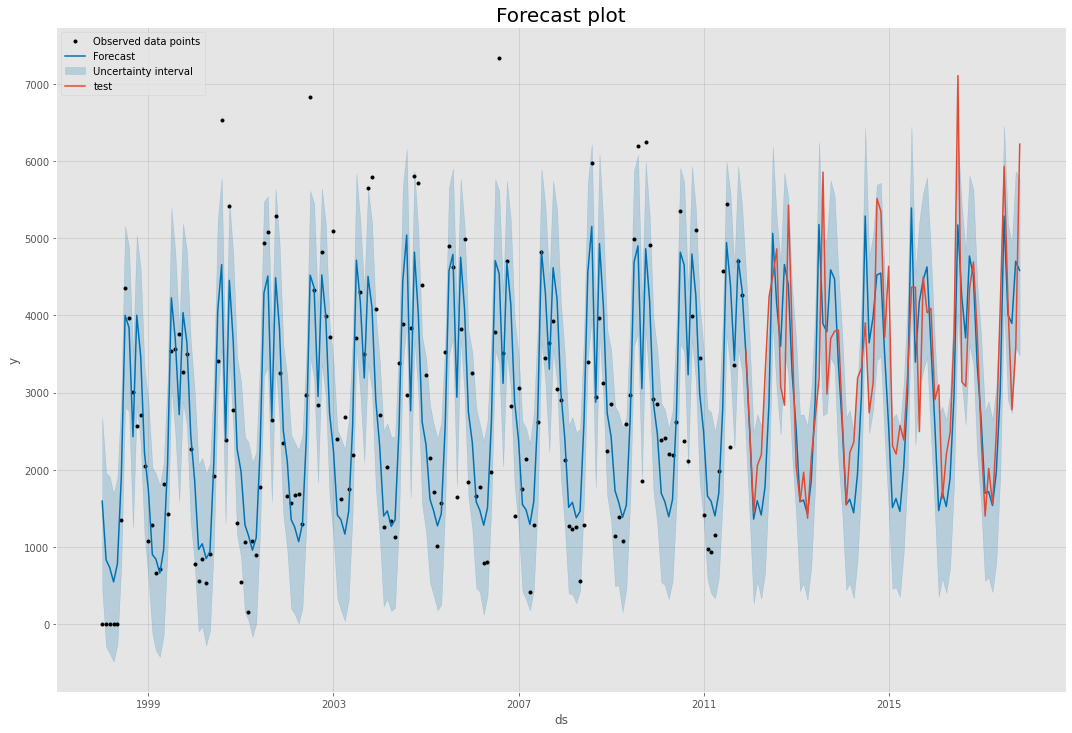

In [28]:
fig, ax = plt.subplots(figsize = (15,10))
model.plot(forecast, ax=ax)
ax.plot(test, label = 'test')
ax.set_title('Forecast plot', fontdict= {'fontsize':20})
plt.legend()
plt.show()

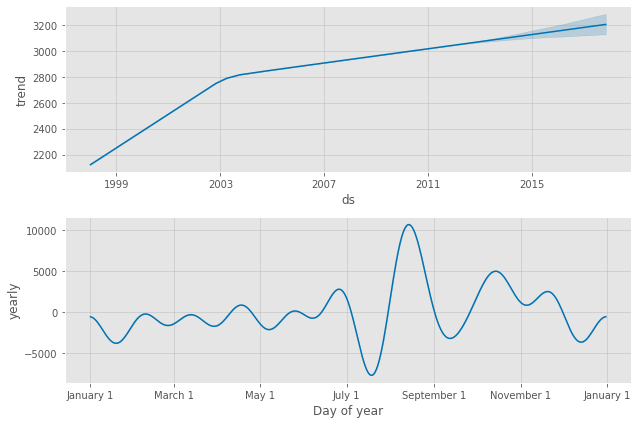

In [29]:
components = model.plot_components(forecast,)

## Evaluating results

In [30]:
from sklearn import metrics

In [31]:
forecast_for_metrics = forecast.loc[167:239,'yhat'].to_frame()

In [32]:
print(f'MAE result: {metrics.mean_absolute_error(test,forecast_for_metrics)}')
print(f'MSE result: {metrics.mean_squared_error(test,forecast_for_metrics)}')
print(f'MAPE result: {metrics.mean_absolute_percentage_error(test,forecast_for_metrics)}')

MAE result: 717.7574701492813
MSE result: 810664.1181510434
MAPE result: 0.21522496000509472


Facebook Prophet model got pretty good results in predicting future number of fires